## Airbnb OnSite Challenge

**Assignment:**  Build a **model** that predicts whether a listing will receive a booking request for a calendar night.

In [2]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data_raw = pd.read_csv('../Airbnb ML DS Takehome to Share/onsite_data_challenge.csv')

In [4]:
data_raw.info()
data = data_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184279 entries, 0 to 184278
Data columns (total 46 columns):
dim_is_requested                                      184279 non-null bool
ds_night                                              184279 non-null object
ds                                                    184279 non-null object
id_listing_anon                                       184279 non-null object
id_user_anon                                          184279 non-null object
m_effective_daily_price                               184279 non-null float64
m_pricing_cleaning_fee                                184279 non-null float64
dim_market                                            184279 non-null object
dim_lat                                               184279 non-null float64
dim_lng                                               184279 non-null float64
dim_room_type                                         184279 non-null object
dim_person_capacity                     

In [163]:
data.iloc[:,0:17].describe()

,m_effective_daily_price,m_pricing_cleaning_fee,dim_lat,dim_lng,dim_person_capacity,m_checkouts,m_reviews,days_since_last_booking,cancel_policy
count,184279.000000,184279.000000,184279.000000,184279.000000,184279.000000,184092.000000,184092.000000,146443.000000,184279.000000
mean,149.405456,38.014286,43.551959,-44.277191,3.265234,18.461883,10.971194,69.174136,4.154109
std,272.233310,49.998184,6.817239,59.187486,2.009478,32.309469,20.020473,123.530963,0.816571
min,-55.000000,0.000000,33.708763,-122.510925,1.000000,0.000000,0.000000,0.000000,3.000000
25%,71.349427,0.000000,34.129663,-118.357056,2.000000,NaN,NaN,NaN,3.000000
50%,100.000000,25.000000,48.844982,2.303334,2.000000,NaN,NaN,NaN,4.000000
75%,152.346733,53.947735,48.871037,2.355681,4.000000,NaN,NaN,NaN,5.000000
max,12995.000000,800.000000,49.187890,2.887966,16.000000,432.000000,280.000000,1041.000000,8.000000


In [164]:
data.iloc[:,17:].describe()

,image_quality_score,m_total_overall_rating,m_professional_pictures,dim_has_wireless_internet,ds_night_day_of_week,ds_night_day_of_year,ds_checkin_gap,ds_checkout_gap,occ_occupancy_plus_minus_7_ds_night,occ_occupancy_plus_minus_14_ds_night,...,general_market_m_reservation_requests_0_6_ds_night,general_market_m_is_booked_0_6_ds_night,m_available_listings_ds_night,kdt_score,r_kdt_listing_views_0_6_avg_n100,r_kdt_n_active_n100,r_kdt_n_available_n100,r_kdt_m_effective_daily_price_n100_p50,r_kdt_m_effective_daily_price_available_n100_p50,r_kdt_m_effective_daily_price_booked_n100_p50
count,170268.000000,184092.000000,184092.000000,184279.000000,184279.000000,184279.000000,182058.000000,182058.000000,163552.000000,163627.000000,...,184279.000000,184279.000000,184279.000000,184279.000000,184278.000000,184278.000000,184278.000000,184278.000000,184262.000000,171304.000000
mean,0.562056,47.881706,4.795211,0.937741,2.998763,174.657953,5.888091,6.123241,0.061373,0.079742,...,91.624327,0.973079,18551.170611,1.067703,2.098260,90.208587,45.636869,109.231766,115.385867,95.601191
std,0.306840,86.908863,8.503853,0.241626,2.004867,108.087953,2.197909,2.041068,0.159816,0.171301,...,48.652866,0.071519,9099.781958,0.523330,2.081157,75.792493,37.506994,64.013523,72.728042,48.744252
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,13.142857,0.571429,1028.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.000000,1.000000,77.000000,NaN,NaN,NaN,NaN,...,56.000000,1.000000,9690.000000,0.666667,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,3.000000,171.000000,NaN,NaN,NaN,NaN,...,83.142857,1.000000,21027.000000,1.037037,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.000000,5.000000,267.000000,NaN,NaN,NaN,NaN,...,116.714286,1.000000,24867.000000,1.396552,NaN,NaN,NaN,NaN,NaN,NaN
max,0.999996,1313.000000,80.000000,1.000000,6.000000,364.000000,7.000000,7.000000,1.000000,1.000000,...,271.571429,1.000000,37892.000000,3.000000,45.081633,910.000000,483.000000,1374.500000,1500.000000,1995.000000


A few quick observations:
- cancel_policy should be converted to categorical.
- dim_lat, dim_lng should be used to calculate distances.
- either impute values or discard the variables with NaN values. Study these individually.

### Missing Values

Calculate the % of NA's in each column. 

In [5]:
missing = data.apply(lambda x: sum(x.isnull()),axis=0).sort_values(ascending = False)
missing[missing>0] / data.shape[0]*100

p3_inquiry_score                                    70.159921
p2_p3_click_through_score                           68.976932
days_since_last_booking                             20.531911
price_booked_most_recent                            20.531911
occ_occupancy_plus_minus_7_ds_night                 11.247619
occ_occupancy_plus_minus_14_ds_night                11.206920
image_quality_score                                  7.603145
r_kdt_m_effective_daily_price_booked_n100_p50        7.040954
occ_occupancy_trailing_90_ds                         5.544853
listing_m_listing_views_2_6_ds_night_decay           1.273070
ds_checkin_gap                                       1.205238
ds_checkout_gap                                      1.205238
m_maximum_nights                                     1.205238
m_minimum_nights                                     1.205238
m_professional_pictures                              0.101477
m_checkouts                                          0.101477
m_review

We remove those variables with over 25% of NA's: 
- `p3_inquiry_score`
- `p2_p3_click_through_score`  

We'll review one by one the following features:
- `days_since_last_booking`, 
- `price_booked_most_recent` 
- `occ_occupancy_plus_minus_7_ds_night`
- `occ_occupancy_plus_minus_14_ds_night`   
- `image_quality_score` 


For these, we will impute either the Mean or Median 
- `r_kdt_m_effective_daily_price_booked_n100_p50 `      
- `occ_occupancy_trailing_90_ds                   `  
- `listing_m_listing_views_2_6_ds_night_decay      `    
- `ds_checkin_gap                                   `   
- `ds_checkout_gap                                   `  
- `m_maximum_nights                                   ` 
- `m_minimum_nights                                    ` 
- `m_professional_pictures                              `
- `m_checkouts                                        `
- `m_reviews              `                              
- `m_total_overall_rating`                               

For the rest (<2% NA's), I'll remove the rows with nulls. 

- `r_kdt_m_effective_daily_price_available_n100_p50`
- `r_kdt_m_effective_daily_price_n100_p50           `  
- `r_kdt_n_available_n100                       `
- `r_kdt_listing_views_0_6_avg_n100              `    
- `r_kdt_n_active_n100       `


In [ ]:
#data.drop([p3_inquiry_score])
#data.drop([p2_p3_click_through_score])

Let's see what's going on with the listings that NaN in **`days_since_last_booking`** and **`price_booked_most_recent`**.

In [166]:
data['days_since_last_booking'][~np.isnan(data['days_since_last_booking'])].describe()

count    146443.000000
mean         69.174136
std         123.530963
min           0.000000
25%           5.000000
50%          20.000000
75%          72.000000
max        1041.000000
Name: days_since_last_booking, dtype: float64

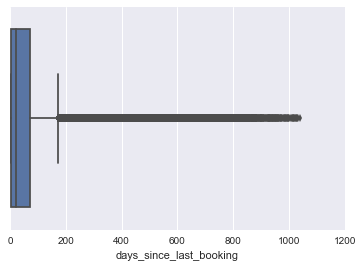

In [167]:
sns.boxplot(data['days_since_last_booking'])
sns.despine()

Most of the listings have been booked within last 4 and 63 days. The average of days_since_last_booking is 70 days with a very high standard deviation. Then we have a bunch of other listings that haven't been booked for over 5 months (180 days)

In [6]:
listings_NoLastBooked = data[data['days_since_last_booking'].isnull()]

In [38]:
# I want to see if the listing that have days_since_last_booking Null are indeed listings that have never been booked.  
listings_NoLastBooked.loc[:,['id_listing_anon', 'id_listing_anon', 'm_checkouts', 'm_reviews', 'm_total_overall_rating']].head(5)

,id_listing_anon,id_listing_anon,m_checkouts,m_reviews,m_total_overall_rating
2,69b2069d-cf8f-49a7-b559-9619dbe86a7d,69b2069d-cf8f-49a7-b559-9619dbe86a7d,0.0,0.0,0.0
3,66baade6-9352-4d7c-b590-745899bd12b3,66baade6-9352-4d7c-b590-745899bd12b3,0.0,0.0,0.0
6,63974898-6e06-4ca9-b6a1-d315d28e64aa,63974898-6e06-4ca9-b6a1-d315d28e64aa,0.0,0.0,0.0
10,393f9565-2f86-4ea3-8d4f-30c3d024cfed,393f9565-2f86-4ea3-8d4f-30c3d024cfed,0.0,0.0,0.0
12,8e41b15d-fe3f-4a3a-85d2-4e1fb65068fb,8e41b15d-fe3f-4a3a-85d2-4e1fb65068fb,0.0,0.0,0.0


In [170]:
pd.crosstab(index = listings_NoLastBooked.m_checkouts, columns="count")

col_0,count
m_checkouts,
0.0,37075
1.0,340
2.0,94
3.0,24
4.0,111
5.0,37
6.0,31
7.0,17
8.0,24


The large mayority except for a few listings that may have been booked and then cancelled. 

So with these listings that has never had a booking, if I have time, I'll create a separate model as some of the listing features may not apply, like ratings, previous price, etc. I'll differentiate these listings with the binary variable **`first_booking`**.

In [33]:
data['first_booking'] = data['days_since_last_booking'].notnull()
data['first_booking'] = [not i for i in data['first_booking']]   #Flip the boolean value

Let's now look at **`image_quality_score`**. 

In [34]:
data['image_quality_score'][~np.isnan(data['image_quality_score'])].describe()

count    170268.000000
mean          0.562056
std           0.306840
min           0.000000
25%           0.300549
50%           0.577958
75%           0.853520
max           0.999996
Name: image_quality_score, dtype: float64

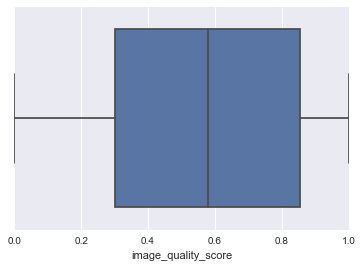

In [172]:
sns.boxplot(data['image_quality_score'])
sns.despine()

I'm going to assume that those listings with no value in image_quality_score have no photos, so I'll assign a 0 value to every NaN. 


In [39]:
data.image_quality_score = data.image_quality_score.fillna(0)

For the variables related to **Occupancy**, given that these have less than 1% of missing values, we can impute these with the mean for the float variables, and with the mode for the integer variables. 
- ds_checkin_gap: 2787 
- ds_checkout_gap: 2787
- occ_occupancy_plus_minus_7_ds_night: 2780 
- occ_occupancy_plus_minus_14_ds_night: 2782
- occ_occupancy_trailing_90_ds

In [40]:
data['ds_checkout_gap'][~np.isnan(data['ds_checkout_gap'])].describe()

count    182058.000000
mean          6.123241
std           2.041068
min           0.000000
25%           7.000000
50%           7.000000
75%           7.000000
max           7.000000
Name: ds_checkout_gap, dtype: float64

`ds_checkout_gap` is very skewed to the right. 

In [67]:
data['occ_occupancy_plus_minus_7_ds_night'][~np.isnan(data['occ_occupancy_plus_minus_7_ds_night'])].describe()

count    2780.000000
mean        0.100717
std         0.207606
min         0.000000
25%         0.000000
50%         0.000000
75%         0.066667
max         1.000000
Name: occ_occupancy_plus_minus_7_ds_night, dtype: float64

In [68]:
data['occ_occupancy_plus_minus_14_ds_night'][~np.isnan(data['occ_occupancy_plus_minus_14_ds_night'])].describe()

count    2782.000000
mean        0.124734
std         0.220647
min         0.000000
25%         0.000000
50%         0.000000
75%         0.172414
max         1.000000
Name: occ_occupancy_plus_minus_14_ds_night, dtype: float64

In [69]:
data['occ_occupancy_trailing_90_ds'][~np.isnan(data['occ_occupancy_trailing_90_ds'])].describe()

count    2601.000000
mean        0.273488
std         0.308139
min         0.000000
25%         0.000000
50%         0.144737
75%         0.511111
max         1.000000
Name: occ_occupancy_trailing_90_ds, dtype: float64

All measures of occupancy rate are concentrated around 0.10 - 0.27

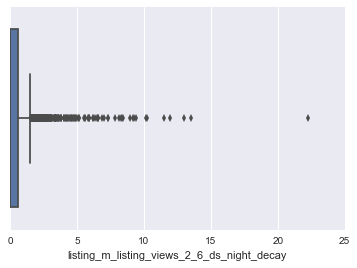

In [70]:
sns.boxplot(data['listing_m_listing_views_2_6_ds_night_decay'])

In [72]:
# calculate the mean of occ_occupancy_plus_minus_7_ds_night
data['occ_occupancy_plus_minus_7_ds_night'].mean()

0.10071662051438852

In [43]:
# Impute the Mean to NaN's
data['occ_occupancy_plus_minus_7_ds_night'] = data['occ_occupancy_plus_minus_7_ds_night'].fillna(data['occ_occupancy_plus_minus_7_ds_night'].mean())
data['occ_occupancy_plus_minus_14_ds_night'] = data['occ_occupancy_plus_minus_14_ds_night'].fillna(data['occ_occupancy_plus_minus_14_ds_night'].mean())
data['occ_occupancy_trailing_90_ds'] = data['occ_occupancy_trailing_90_ds'].fillna(data['occ_occupancy_trailing_90_ds'].mean())
data['listing_m_listing_views_2_6_ds_night_decay'] = data['listing_m_listing_views_2_6_ds_night_decay'].fillna(data['listing_m_listing_views_2_6_ds_night_decay'].mean())

In [44]:
# Calculate the median of ds_checkin_gap
data['ds_checkin_gap'].median()

7.0

In [42]:
# Impute the Median to NaN's
data['ds_checkin_gap'] = data['ds_checkin_gap'].fillna(data['ds_checkin_gap'].median())
data['ds_checkout_gap'] = data['ds_checkout_gap'].fillna(data['ds_checkout_gap'].median())
data['m_minimum_nights'] = data['m_minimum_nights'].fillna(data['m_minimum_nights'].median())
data['m_maximum_nights'] = data['m_maximum_nights'].fillna(data['m_maximum_nights'].median())

In [47]:
missing = data.apply(lambda x: sum(x.isnull()),axis=0).sort_values(ascending = False)
missing[missing>0] / data.shape[0]*100

p3_inquiry_score                                    70.159921
p2_p3_click_through_score                           68.976932
price_booked_most_recent                            20.531911
days_since_last_booking                             20.531911
r_kdt_m_effective_daily_price_booked_n100_p50        7.040954
m_checkouts                                          0.101477
m_professional_pictures                              0.101477
m_total_overall_rating                               0.101477
m_reviews                                            0.101477
r_kdt_m_effective_daily_price_available_n100_p50     0.009225
r_kdt_m_effective_daily_price_n100_p50               0.000543
r_kdt_n_available_n100                               0.000543
r_kdt_n_active_n100                                  0.000543
r_kdt_listing_views_0_6_avg_n100                     0.000543
dtype: float64

In [ ]:
data_pre_eda = data
data = drop(['p3_inquiry_score'], axis=1)
data = drop(['p2_p3_click_through_score'], axis=1)
#divide data by new and former listings:
data_former = data[]

In [51]:
#Assign 9999 to the NA's for these 2 variables. That's how we'll identify new listings from old listings:
data.price_booked_most_recent = data.price_booked_most_recent.fillna(9999)
data.days_since_last_booking = data.days_since_last_booking.fillna(9999)

In [52]:
#divide data by new and former listings:
data_new = data[data.price_booked_most_recent == 9999]
data_former = data[data.price_booked_most_recent <> 9999]

In [53]:
data = data_former
missing = data.apply(lambda x: sum(x.isnull()),axis=0).sort_values(ascending = False)
missing[missing>0] / data.shape[0]*100

p3_inquiry_score                                    68.675184
p2_p3_click_through_score                           67.598998
r_kdt_m_effective_daily_price_booked_n100_p50        6.250213
m_checkouts                                          0.114038
m_professional_pictures                              0.114038
m_total_overall_rating                               0.114038
m_reviews                                            0.114038
r_kdt_m_effective_daily_price_available_n100_p50     0.008877
dtype: float64

In [54]:
data = data.drop(['p3_inquiry_score'], axis=1)
data = data.drop(['p2_p3_click_through_score'], axis=1)

In [55]:
# remove the rows with nulls
data.r_kdt_m_effective_daily_price_booked_n100_p50 = data.r_kdt_m_effective_daily_price_booked_n100_p50.fillna(9999)
data.m_checkouts = data.m_checkouts.fillna(9999)
data.m_professional_pictures = data.m_professional_pictures.fillna(9999)
data.m_total_overall_rating = data.m_total_overall_rating.fillna(9999)
data.m_reviews = data.m_reviews.fillna(9999)
data.r_kdt_m_effective_daily_price_available_n100_p50 = data.r_kdt_m_effective_daily_price_available_n100_p50.fillna(9999)

data= data[data.r_kdt_m_effective_daily_price_booked_n100_p50 <> 9999]
data= data[data.m_checkouts <> 9999]
data= data[data.m_professional_pictures <> 9999]
data= data[data.m_total_overall_rating <> 9999]
data= data[data.m_reviews <> 9999]
data= data[data.r_kdt_m_effective_daily_price_available_n100_p50 <> 9999]


In [56]:
missing = data.apply(lambda x: sum(x.isnull()),axis=0).sort_values(ascending = False)
missing[missing>0] / data.shape[0]*100

Series([], dtype: float64)

### Exploratory Data Analysis

**`ds_night`**

Calculate the percentage of listings booked by date

In [57]:
df_ct1 = pd.crosstab(index = data["dim_is_requested"], columns =  data["ds_night"]).apply(lambda r: r/r.sum(), axis=0)
df_ct1.index = ["not booked", "booked"]
df_ct1

ds_night,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-10 00:00:00,...,2015-12-21 00:00:00,2015-12-22 00:00:00,2015-12-23 00:00:00,2015-12-24 00:00:00,2015-12-25 00:00:00,2015-12-26 00:00:00,2015-12-27 00:00:00,2015-12-28 00:00:00,2015-12-29 00:00:00,2015-12-30 00:00:00
not booked,0.529586,0.68262,0.70362,0.767123,0.801688,0.720824,0.769932,0.770563,0.711497,0.732584,...,0.754762,0.761905,0.801887,0.741071,0.740476,0.770202,0.70892,0.68254,0.630208,0.60582
booked,0.470414,0.31738,0.29638,0.232877,0.198312,0.279176,0.230068,0.229437,0.288503,0.267416,...,0.245238,0.238095,0.198113,0.258929,0.259524,0.229798,0.29108,0.31746,0.369792,0.39418


In [58]:
df_ct1 = pd.crosstab(index = data["dim_is_requested"], columns = data["ds_night_day_of_week"]).apply(lambda r: r/r.sum(), axis=0)
df_ct1.index = ["not booked", "booked"]
df_ct1

ds_night_day_of_week,0,1,2,3,4,5,6
not booked,0.630167,0.634342,0.626262,0.614533,0.595332,0.574138,0.573169
booked,0.369833,0.365658,0.373738,0.385467,0.404668,0.425862,0.426831


For San Francisco

In [71]:
datasf = data[data["dim_market"] == 'San Francisco']
df_ctsf = pd.crosstab(index = datasf["dim_is_requested"], columns = datasf["ds_night_day_of_week"]).apply(lambda r: r/r.sum(), axis=0)
df_ctsf.index = ["not booked", "booked"]
df_ctsf

ds_night_day_of_week,0,1,2,3,4,5,6
not booked,0.511439,0.523256,0.487073,0.474134,0.48076,0.485728,0.485344
booked,0.488561,0.476744,0.512927,0.525866,0.51924,0.514272,0.514656


For Los Angeles

In [72]:
datala = data[data["dim_market"] == 'Los Angeles']
df_ctla = pd.crosstab(index = datala["dim_is_requested"], columns = datala["ds_night_day_of_week"]).apply(lambda r: r/r.sum(), axis=0)
df_ctla.index = ["not booked", "booked"]
df_ctla

ds_night_day_of_week,0,1,2,3,4,5,6
not booked,0.543588,0.564112,0.551227,0.54698,0.515991,0.47083,0.464014
booked,0.456412,0.435888,0.448773,0.45302,0.484009,0.52917,0.535986


For Paris:

In [73]:
datapa = data[data["dim_market"] == 'Paris']
df_ctpa = pd.crosstab(index = datapa["dim_is_requested"], columns = datapa["ds_night_day_of_week"]).apply(lambda r: r/r.sum(), axis=0)
df_ctpa.index = ["not booked", "booked"]
df_ctpa

ds_night_day_of_week,0,1,2,3,4,5,6
not booked,0.693059,0.689708,0.689851,0.674469,0.654458,0.63768,0.640536
booked,0.306941,0.310292,0.310149,0.325531,0.345542,0.36232,0.359464


Overall can clearly see that there's a higher percentage of listings booked on Saturday (6) 4th of July (independence day), then Thursday (4), Wednesday (3) and Friday. Because of 4th of July holiday is during a weekend, many places in the US give Friday as holiday, which explains why Thursday July 2nd is the second most popular day after the 4th. 

- For SF, the higher percentage of bookings are on Saturday, Sunday and Monday. 
- For LA, the higher percentage of bookings are on Thursday, Friday, and Saturday. 
- For Paris, the higher percentage of bookings are on Wednesday, Thursday, and Saturday. 

**`dim_market`**

/Users/iglopezfrancos/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


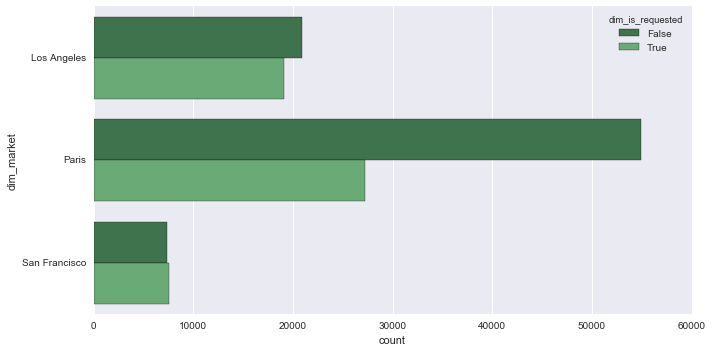

In [65]:
plt.subplots(figsize=(10, 5), tight_layout=True)
ax = sns.countplot(y="dim_market", hue="dim_is_requested", data=data, palette="Greens_d")

We can see that for the first week of July, Paris by far the city with most listings already booked. This makes sense as people tend to book in advance when they travel abroad than domestic.

**`dim_person_capacity`**

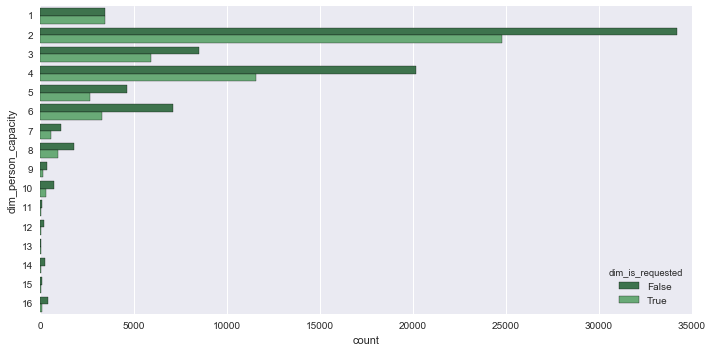

In [66]:
plt.subplots(figsize=(10, 5), tight_layout=True)
ax = sns.countplot(y="dim_person_capacity", hue="dim_is_requested", data=data, palette="Greens_d")

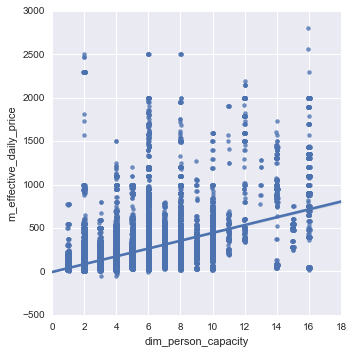

In [67]:
ax = sns.lmplot(x="dim_person_capacity", y="m_effective_daily_price", \
                data=data[(data['m_effective_daily_price']<3000)], x_jitter=.05);

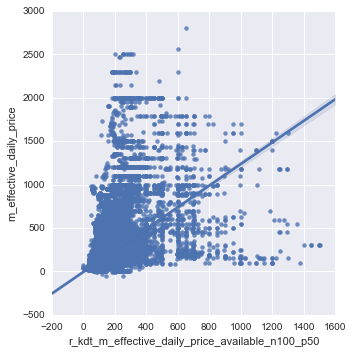

In [70]:
ax = sns.lmplot(x="r_kdt_m_effective_daily_price_available_n100_p50", y="m_effective_daily_price", \
                data=data[(data['m_effective_daily_price']<3000)], x_jitter=.05);

As expected, there's a clear positive correlation between number of rooms and listing average price. 

**`dim_has_wireless_internet`**

dim_is_requested              False     True 
dim_has_wireless_internet                    
0                          0.579882  0.420118
1                          0.490748  0.509252


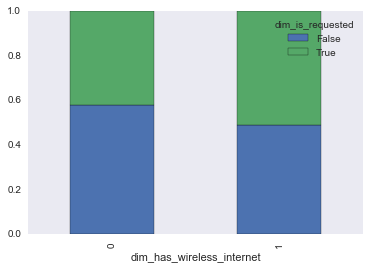

In [74]:
wifi_ct = pd.crosstab(datasf['dim_has_wireless_internet'], datasf['dim_is_requested']).apply(lambda r: r/r.sum(), axis=1)
print wifi_ct
wifi_ct.plot(kind='bar', stacked=True, grid=False)

Wifi is very important for guests travelling to SF. We can see that a listing with wifi hast twice the chance of being booked than one without it.  

dim_is_requested              False     True 
dim_has_wireless_internet                    
0                          0.744928  0.255072
1                          0.518853  0.481147


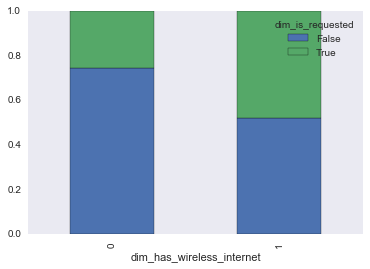

In [75]:
wifi_ct_la = pd.crosstab(datala['dim_has_wireless_internet'], datala['dim_is_requested']).apply(lambda r: r/r.sum(), axis=1)
print wifi_ct_la
wifi_ct_la.plot(kind='bar', stacked=True, grid=False)

Similarly in LA. Only 10% of the bookings that have wifi have been booked, compared with 48%. 

dim_is_requested           False  True 
dim_has_wireless_internet              
0                           3002   1119
1                          51970  26158
dim_is_requested              False     True 
dim_has_wireless_internet                    
0                          0.728464  0.271536
1                          0.665190  0.334810


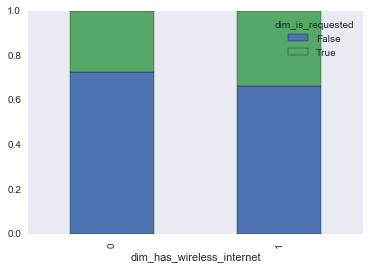

In [78]:
print wifi_ct_pa
wifi_ct_pa_r = wifi_ct_pa.apply(lambda r: r/r.sum(), axis=1)
print wifi_ct_pa_r
wifi_ct_pa_r.plot(kind='bar', stacked=True, grid=False)

For Paris, having Wifi is still positively correlated with having wifi, but the difference is smaller. It's also true that there exist more listings that dont have wifi.

**`m_total_overall_rating`**

In [79]:
data['m_total_overall_rating'].describe()

count    137121.000000
mean         60.932993
std          94.430004
min           0.000000
25%           5.000000
50%          25.000000
75%          73.000000
max        1313.000000
Name: m_total_overall_rating, dtype: float64

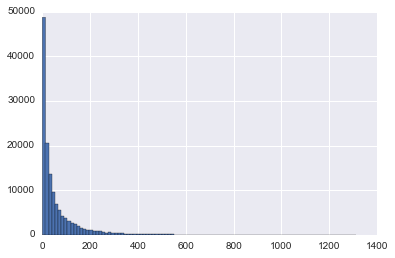

In [80]:
data.m_total_overall_rating.hist(bins=100)

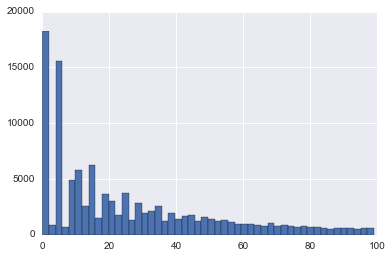

In [81]:
data[data['m_total_overall_rating']<100].m_total_overall_rating.hist(bins=50)

In [82]:
float(len(data[data.m_total_overall_rating==0])) / len(data)

0.13161368426426295

Very skewed to the left, with over 30% of listings with 0 ratings. 

### Feature Engineering

In this section, I'll look into the type of variables and perform transformations and/or create new variables when considered.

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137121 entries, 0 to 184278
Data columns (total 52 columns):
dim_is_requested                                      137121 non-null bool
ds_night                                              137121 non-null datetime64[ns]
ds                                                    137121 non-null object
id_listing_anon                                       137121 non-null category
id_user_anon                                          137121 non-null category
m_effective_daily_price                               137121 non-null float64
m_pricing_cleaning_fee                                137121 non-null float64
dim_market                                            137121 non-null category
dim_lat                                               137121 non-null float64
dim_lng                                               137121 non-null float64
dim_room_type                                         137121 non-null category
dim_person_capacity     

Some users may have multiple listings. It seems intuitive that users with more than one listing should have more expertise as a host and this could be a factor of the quality of the listing. Let's calculate a feature that indicates number of listings that user has. 

We'll call this variable **`list_count`**

In [84]:
user_listings = pd.DataFrame({'list_count':  data.drop_duplicates(['id_user_anon', 'id_listing_anon']).groupby('id_user_anon').size()}).reset_index()

In [9]:
user_listings.sort_values(by='list_count', ascending=False).head(10)

,id_user_anon,list_count
4256,890660cf-18cd-4f5b-a90a-80059fe8d550,44
3811,7ae6552f-d3a4-49b4-ba20-840cc52c1b02,41
1735,3808edfe-6b3b-4317-b6eb-9ef0c894c0b2,41
7676,f7c9f358-e8d4-428c-9e59-6f8d513b4754,39
21,00abd21b-2b3d-4278-9671-e80a224c21aa,38
4040,8214c919-070e-469e-9317-7cb97c41624c,33
3153,663dece9-0618-405c-a2bf-bef6005a40b1,31
5793,bae4027d-ec59-47b9-9fb1-c80e27985d3a,30
6064,c4579656-4a41-4080-99cf-dfef8fa3b350,28
6806,dccab311-1848-40d2-a805-fd617c3fd72e,23


In [10]:
data1 = data.copy()
data1 = pd.merge(data, user_listings, on = "id_user_anon", how = "inner")
#data1.iloc[:,-1].sort_values(ascending = False).head(8)
data1.columns

Index([u'dim_is_requested', u'ds_night', u'ds', u'id_listing_anon',
       u'id_user_anon', u'm_effective_daily_price', u'm_pricing_cleaning_fee',
       u'dim_market', u'dim_lat', u'dim_lng', u'dim_room_type',
       u'dim_person_capacity', u'dim_is_instant_bookable', u'm_checkouts',
       u'm_reviews', u'days_since_last_booking', u'cancel_policy',
       u'image_quality_score', u'm_total_overall_rating',
       u'm_professional_pictures', u'dim_has_wireless_internet',
       u'ds_night_day_of_week', u'ds_night_day_of_year', u'ds_checkin_gap',
       u'ds_checkout_gap', u'occ_occupancy_plus_minus_7_ds_night',
       u'occ_occupancy_plus_minus_14_ds_night',
       u'occ_occupancy_trailing_90_ds', u'm_minimum_nights',
       u'm_maximum_nights', u'price_booked_most_recent',
       u'p2_p3_click_through_score', u'p3_inquiry_score',
       u'listing_m_listing_views_2_6_ds_night_decay',
       u'general_market_m_unique_searchers_0_6_ds_night',
       u'general_market_m_contacts_0_6_ds_nig

In [11]:
data = data1.copy()

I also generate a boolean variable to indicate if the listing has a cleaning fee: **`has_cleaning_fee`** 

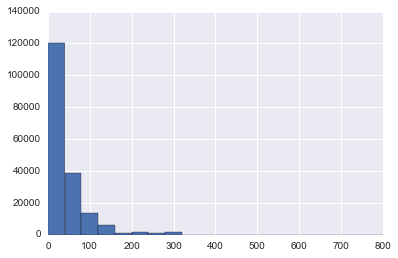

In [12]:
data.m_pricing_cleaning_fee.hist(bins=20)

In [13]:
len(data[data.m_pricing_cleaning_fee==0])

62687

Practically 50% of the listings have no cleaning fee. 

In [14]:
def cleaning_fee (row):
    if row['m_pricing_cleaning_fee'] == 0:
        return 0
    return 1

In [15]:
data['has_cleaning_fee'] = data.apply (lambda row: cleaning_fee (row),axis=1)

I noticed that apart from the city and coordinates, we don't have any other location feature. It'd be relevant to know how close the listing is from downtown. 

It'd be interesting to see for each listing which neighborhood are they situated but due to the lack of time I'm just going to see how close they are from downtown. 
To do so, I'm going to use the library `geopy` and calculate the **`distance_from_downtown`**

In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
Paris_downtown = geolocator.geocode("Paris, France")
LA_downtown  = geolocator.geocode("Los Angeles, CA")
SF_downtown = geolocator.geocode("San Francisco, CA")

In [17]:
print Paris_downtown.latitude
print Paris_downtown.longitude
print LA_downtown.latitude
print LA_downtown.longitude
print SF_downtown.latitude
print SF_downtown.longitude

48.8566101
2.3514992
34.0543942
-118.2439408
37.7792808
-122.4192362


In [18]:
# Test for one random user
user5 = data.loc[5,['dim_market','dim_lat', 'dim_lng']]
user5

dim_market    Los Angeles
dim_lat           34.0539
dim_lng          -118.363
Name: 5, dtype: object

In [19]:
user5_loc = data.loc[5,['dim_lat', 'dim_lng']]
user5

dim_market    Los Angeles
dim_lat           34.0539
dim_lng          -118.363
Name: 5, dtype: object

In [20]:
from geopy.distance import great_circle

great_circle((user5['dim_lat'],user5['dim_lng']), (Paris_downtown.latitude, Paris_downtown.longitude)).miles

5650.848485669666

In [21]:
data2 = data.copy()
data2['market_lat'] = data2['dim_market'].map(lambda x: Paris_downtown.latitude if x == 'Paris' \
                                              else LA_downtown.latitude if x == 'Los Angeles' \
                                              else SF_downtown.latitude )
data2['market_lon'] = data2['dim_market'].map(lambda x: Paris_downtown.longitude if x == 'Paris' \
                                              else LA_downtown.longitude if x == 'Los Angeles' \
                                              else SF_downtown.longitude )

Now let's calculate the distances using great circle technique

In [22]:
from geopy.distance import great_circle

data2['distance_from_downtown'] = data2.apply(lambda x: great_circle((x['market_lat'],x['market_lon']), \
                                               (x['dim_lat'],x['dim_lng'])).miles,  axis=1)

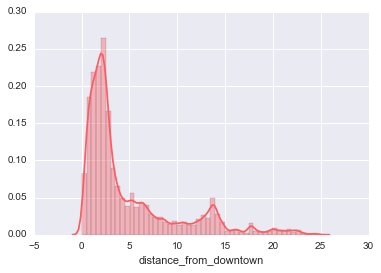

In [189]:
sns.distplot(data2['distance_from_downtown'], color='#FD5C64')
sns.despine()

In [23]:
data = data2.copy()

Let's take a look at **`m_professional_pictures`**

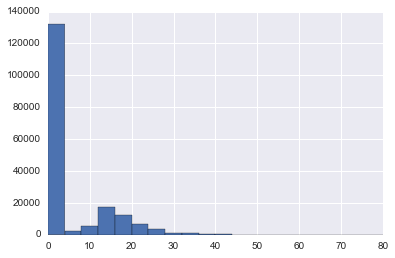

In [24]:
data.m_professional_pictures.hist(bins=20)


In [25]:
float(len(data[data.m_professional_pictures==0])) / len(data)

0.7138957775980985

We can see that 71% of the listings don't have "professional photos" in their profile. As with `m_pricing_cleaning_fee`, let's create a binary variable that differentiates the listings with professional photos from those that don't have: **`has_prof_pic`** 

In [26]:
def prof_pic (row):
    if row['m_professional_pictures'] == 0:
        return 0
    return 1

In [37]:
data['has_prof_pic'] = data.apply (lambda row: prof_pic (row),axis=1)

We also create a binary with `m_total_overall_rating` as 30% has an overall rating of 0. 

In [28]:
def rating (row):
    if row['m_total_overall_rating'] == 0:
        return 0
    return 1

In [29]:
data['has_rating'] = data.apply (lambda row: rating (row),axis=1)

Now before starting modeling, let's make sure the data types are the correct ones for every feature. 

In [88]:
categorical_features = [
    'id_listing_anon',
    'id_user_anon',
    'dim_market',
    'dim_room_type',
    'cancel_policy',
    'ds_night_day_of_week',
    'ds_night_day_of_year' , 
    'dim_has_wireless_internet',
    'has_cleaning_fee',
    'has_prof_pic',
    'has_rating',
'first_booking', 
    'dim_is_instant_bookable'
    ]

for x in categorical_features:
    data[x] = data[x].astype('category')

In [89]:
data['ds_night'] = pd.to_datetime(data['ds_night'])

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137121 entries, 0 to 184278
Data columns (total 52 columns):
dim_is_requested                                      137121 non-null bool
ds_night                                              137121 non-null datetime64[ns]
ds                                                    137121 non-null object
id_listing_anon                                       137121 non-null category
id_user_anon                                          137121 non-null category
m_effective_daily_price                               137121 non-null float64
m_pricing_cleaning_fee                                137121 non-null float64
dim_market                                            137121 non-null category
dim_lat                                               137121 non-null float64
dim_lng                                               137121 non-null float64
dim_room_type                                         137121 non-null category
dim_person_capacity     

## Modeling 

Let's now build a model that predicts whether a listing will receive a booking request for a calendar night.

I'm going to start building a model for the dataset of listings with at least one booking. 

Later--if I have time--I'll build a separate model for the new listings. 

I'd be interesting to try building a model for each market (city) in the future. 

First I select the first group of features: 

In [91]:
df = data
features = ['dim_market', 'cancel_policy', 'dim_room_type', 'ds_night_day_of_week', 'ds_night_day_of_year',
            'm_effective_daily_price','dim_person_capacity', 'dim_is_instant_bookable', 'm_checkouts', 
           'm_reviews','image_quality_score', 'm_total_overall_rating', 'dim_has_wireless_internet', 
           'ds_checkin_gap','ds_checkout_gap','occ_occupancy_plus_minus_7_ds_night', 'occ_occupancy_plus_minus_14_ds_night',
           'occ_occupancy_trailing_90_ds', 'm_minimum_nights', 'm_maximum_nights','listing_m_listing_views_2_6_ds_night_decay', 
           'general_market_m_unique_searchers_0_6_ds_night','general_market_m_contacts_0_6_ds_night', 
            'general_market_m_reservation_requests_0_6_ds_night', 'm_available_listings_ds_night', 'list_count',
           'has_cleaning_fee', 'distance_from_downtown', 'has_prof_pic', 'has_rating', 
           'kdt_score', 
            'r_kdt_listing_views_0_6_avg_n100',
            'r_kdt_n_active_n100',
            'r_kdt_n_available_n100',   
            'r_kdt_m_effective_daily_price_n100_p50',  
            'r_kdt_m_effective_daily_price_available_n100_p50', 
            'r_kdt_m_effective_daily_price_booked_n100_p50'
           ]
df_feat = df[features]

Create the dummy variables for the categorical. 

In [92]:
#One-hot-encoding features
one_feats = ['dim_market', 'cancel_policy', 'dim_room_type', 'ds_night_day_of_week', 'ds_night_day_of_year']

for f in one_feats:
    df_all_dummy = pd.get_dummies(df[f], prefix=f)
    df_feat = df_feat.drop([f], axis=1)
    df_feat = pd.concat((df_feat, df_all_dummy), axis=1)

Split the dataset 70-30

In [93]:
import random
X = df_feat
Y = df['dim_is_requested']
rows = random.sample(df.index, int(len(df)*.70))
x_train, y_train = X.ix[rows],Y.ix[rows]
x_test,y_test  = X.drop(rows),Y.drop(rows)

In [94]:
print "Rows in train set: %s" %len(x_train)
print "Rows in test set: %s" %len(x_test)

Rows in train set: 95984
Rows in test set: 41137


### Model 1: RF
Fit a Random Forest model.

I pick Random Forest as it usually requires very little to optimize, handeles well outliers, irrelevant variables, and both continuous and categorical variables. I'll use the default parameters and set n_estimators to 50. 

In [95]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
# Evaluate the Random Forest model using cross-validation:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(rf_model, x_test, y_test, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.80025988  0.81171945  0.79477666], Average AUC 0.802251996817


In [156]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, \
recall_score, confusion_matrix, classification_report, roc_auc_score

pred_rf = rf_model.predict(x_test)
print "F1 score:", f1_score(y_test, pred_rf)
print "Precision:", precision_score(y_test, pred_rf)
print "Recall:", recall_score(y_test, pred_rf)
print "Accuracy:", accuracy_score(y_test, pred_rf)

F1 score: 0.733302473218
Precision: 0.791788646912
Recall: 0.682862245212
Accuracy: 0.803923475217


In [98]:
features = X.columns
feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(15)

,Features,Importance Score
0,m_effective_daily_price,0.066814
12,occ_occupancy_trailing_90_ds,0.066194
15,listing_m_listing_views_2_6_ds_night_decay,0.066079
19,m_available_listings_ds_night,0.040727
3,m_checkouts,0.034273
26,r_kdt_listing_views_0_6_avg_n100,0.033266
6,m_total_overall_rating,0.032257
17,general_market_m_contacts_0_6_ds_night,0.032241
29,r_kdt_m_effective_daily_price_n100_p50,0.031880
31,r_kdt_m_effective_daily_price_booked_n100_p50,0.031640


### Model 2: GBM
Fit a Gradient Tree Boosting model.

Next I'm going to use GBM which is also a tree-based algorithm, but it uses boosting which can outperform Random Forests once they plateau. 
This type of models take more time to train but they normally have high predictive accuracy than RF.

Later, I'll add regularization and parameter tuning with will help in finding the best combination of parameters that optimizes our evaluation metrics.

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': 50,'learning_rate': 0.1,'max_depth': 6}
gbm_model = GradientBoostingClassifier(**params).fit(x_train, y_train)

In [101]:
pred = gbm_model.predict(x_test)
print "F1 score:", f1_score(y_test, pred)
print "Precision:", precision_score(y_test, pred)
print "Recall:", recall_score(y_test, pred)
print "Accuracy:", accuracy_score(y_test, pred)
print "AUC:", roc_auc_score(y_test, pred)

F1 score: 0.708232013747
Precision: 0.747877293892
Recall: 0.672578360736
Accuracy: 0.781243163089
AUC: 0.762347498305


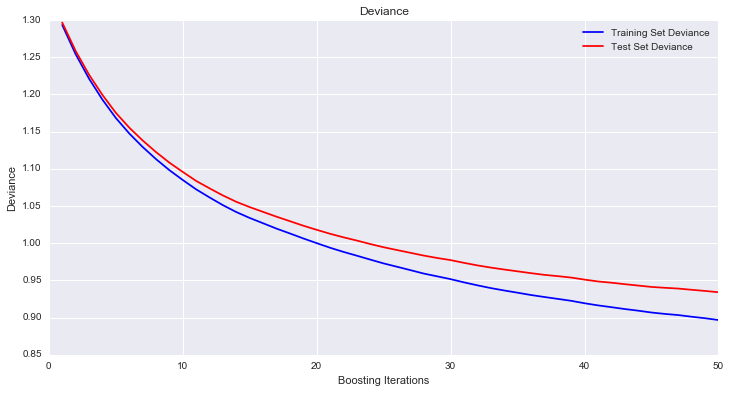

In [102]:
import matplotlib.pyplot as plt

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbm_model.staged_decision_function(x_test)):
    test_score[i] = gbm_model.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbm_model.train_score_, 'b-',
                label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
                label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

We can see that with the default set of parameters chosen, the big separation between both training and testing curves indicates overfitting. This model will require some parameter tuning.

In [103]:
cm = confusion_matrix(y_test, pred)
cm

array([[21216,  3682],
       [ 5317, 10922]])

### Model 3: GBM + CV & Grid Search


We'll now try **Cross-Validation** using Grid Search to find out the best set of tuning parameters for the GBM.We will optimize for F1 score. 

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

In [133]:
param_grid = {'max_features': [0.5, 0.1],
          'learning_rate': [0.1, 0.05],
          'max_depth': [4, 6],
          'min_samples_leaf': [1],
          'n_estimators': [50]      # Increase this to reduce overfitting. very time consuming. 
         }


In [134]:
gbm_model = GradientBoostingClassifier()
gbm_cv_model = GridSearchCV(gbm_model, param_grid, scoring = "f1").fit(x_train, y_train)

In [152]:
param_best = gbm_cv_model.best_params_
print param_best

{'max_features': 0.1, 'n_estimators': 50, 'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 1}


In [148]:
gbm_model_best = GradientBoostingClassifier(**param_best).fit(x_train, y_train)

In [149]:
pred = gbm_model_best.predict(x_test)
print "F1 score:", f1_score(y_test, pred)
print "Precision:", precision_score(y_test, pred)
print "Recall:", recall_score(y_test, pred)
print "Accuracy:", accuracy_score(y_test, pred)
print "AUC:", roc_auc_score(y_test, pred)

F1 score: 0.705870879657
Precision: 0.747572815534
Recall: 0.66857565121
Accuracy: 0.780052021295
AUC: 0.760667454491


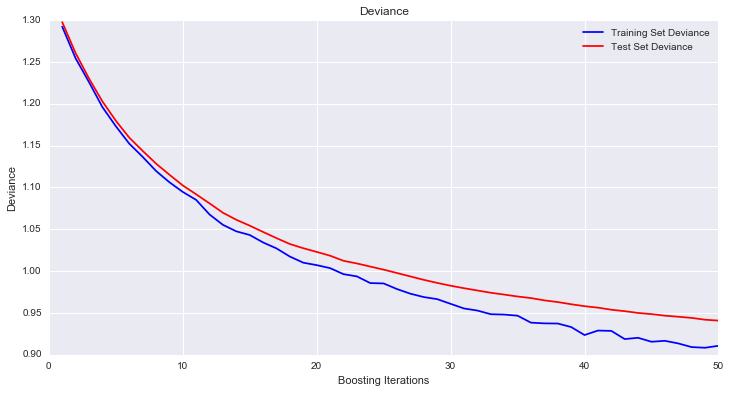

In [150]:
import matplotlib.pyplot as plt

# compute test set deviance
test_score = np.zeros((param_best['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbm_model_best.staged_decision_function(x_test)):
    test_score[i] = gbm_model_best.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(param_best['n_estimators']) + 1, gbm_model_best.train_score_, 'b-',
                label='Training Set Deviance')
plt.plot(np.arange(param_best['n_estimators']) + 1, test_score, 'r-',
                label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

From the chart above we can see that the modele generalizes well although it hasn't improved much compared with the previous GBM with the default parameters.

In [153]:
cm = confusion_matrix(y_test, pred)
cm

array([[21232,  3666],
       [ 5382, 10857]])

Let's take a look at the feature importance for this model

In [154]:
features = X.columns
feature_importances = gbm_model_best.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(15)

,Features,Importance Score
0,m_effective_daily_price,0.168958
15,listing_m_listing_views_2_6_ds_night_decay,0.102424
12,occ_occupancy_trailing_90_ds,0.098121
19,m_available_listings_ds_night,0.091250
30,r_kdt_m_effective_daily_price_available_n100_p50,0.041652
29,r_kdt_m_effective_daily_price_n100_p50,0.039241
22,distance_from_downtown,0.037562
16,general_market_m_unique_searchers_0_6_ds_night,0.035117
31,r_kdt_m_effective_daily_price_booked_n100_p50,0.030874
13,m_minimum_nights,0.028576


I tried a few other combination of parameters, focusing on those key parameters that I expect will have the biggest impact on the results (lowering the learning rate and increasing the n_estimators), and it resulted in just a tiny improvement of barely one decimal point in every evaluation metric.

Overall, an AUC = 0.76 is considered a good model. With more time, I could perform real hyper-parameter optimization and see if I can beat the best AUC so far. 

In [105]:
feature_names = features_df["Features"].values
feature_names

array(['m_effective_daily_price', 'occ_occupancy_trailing_90_ds',
       'listing_m_listing_views_2_6_ds_night_decay',
       'm_available_listings_ds_night', 'm_checkouts',
       'r_kdt_listing_views_0_6_avg_n100', 'm_total_overall_rating',
       'general_market_m_contacts_0_6_ds_night',
       'r_kdt_m_effective_daily_price_n100_p50',
       'r_kdt_m_effective_daily_price_booked_n100_p50',
       'distance_from_downtown',
       'general_market_m_unique_searchers_0_6_ds_night', 'kdt_score',
       'r_kdt_m_effective_daily_price_available_n100_p50',
       'general_market_m_reservation_requests_0_6_ds_night',
       'r_kdt_n_available_n100', 'image_quality_score',
       'r_kdt_n_active_n100', 'm_reviews',
       'occ_occupancy_plus_minus_14_ds_night', 'dim_person_capacity',
       'm_maximum_nights', 'm_minimum_nights', 'list_count',
       'occ_occupancy_plus_minus_7_ds_night', 'ds_checkin_gap',
       'ds_checkout_gap', 'has_prof_pic', 'dim_market_Paris',
       'dim_is_instant_b

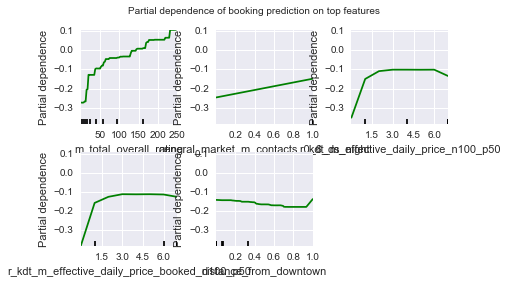

In [111]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
                                           
# Features are ranked by importance in our previous model.
# I'm going to plot charts for the top 5-10
features = [6, 7, 8, 9, 10]

fig, axs = plot_partial_dependence(gbm_model, 
                                   x_train, 
                                   features,
                                   feature_names=feature_names,
                                   n_jobs=-1,   # Use ‘all CPUs’.
                                   grid_resolution=100)
fig.suptitle('Partial dependence of booking prediction on top features')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
plt.show()

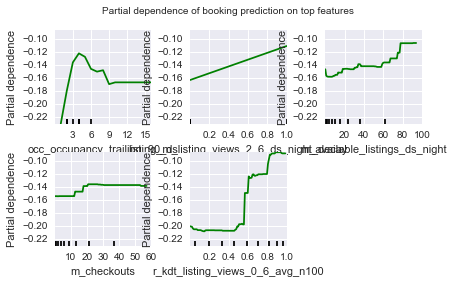

In [110]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
                                           
# Features are ranked by importance in our previous model.
# I'm going to plot charts for the top 5
features = [1, 2, 3, 4, 5]

fig, axs = plot_partial_dependence(gbm_model, 
                                   x_train, 
                                   features,
                                   feature_names=feature_names,
                                   n_jobs=-1,  
                                   grid_resolution=100)
fig.suptitle('Partial dependence of booking prediction on top features')
plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle
plt.show()

Some insights from the Partial Dependency Plots. 
Looking at the trends, we can see:
- Likelihood of booking rises with overall rating. 
- Likelihood of booking rises when Avg Listing views for kdt-room reaches 0.6. 
- The number of checkouts increases the likelihood of booking but after 20 checkings it seems like it doesn't impact it. This number could be used to suggest a host a # checkouts goal.



### Conclusions and Future Steps

It's not surprising that those listings that are more popular within Airbnb (as measured by Occupancy rate, Average listing views, Total checkouts, and Overall Rating) are more likely to be booked. 

Top rated and popular listings are normally ranked and placed on top of the Search results list on the website, and tend to be the booked more quickly by the user than those that aren't.

Unfortunately the host can't control many of these variables. However, pricing and quality of the images in the listing are two very important predictors of a booking. 

Having high quality pictures of the unit increases the likelihood that it will be reserved. In its origins, Airbnb had a Craigslist-rough and functionalist style, promoting shots of hosts or scenery over decor ("better than a cheap hotel”). But by 2012 Airbnb settled into the well-designed, image-focused format it has today (i.e. high-resolution, full-bleed images, decor tips, etc), allowing users to present their listings not just as convenient hotel alternatives, but as places where users would love to live permanently. This is one of the reasons why Airbnb provides a professional photography service for free to any host and [tips to attract more guests with better photos](http://blog.airbnb.com/attract-guests-10-simple-tips-home-staging-expert-meridith-baer/). The aspirational content has also helped Airbnb differentiate and conquer predecessors like Couchsurfing.org.

Pricing is equally and proactively considered by the platform: Airbnb is able to make a (subtle) suggestion to lower the price to hosts with less popular listings. 

Distance from city center is also a good predictor of the likelihood of a listing to be booked.

Given more time and collaboration with the Airbnb team, I'd optimize some of the current features like distance or difference in pricing by crossing them with other dimensions. For each city we could map the most popular neighborhoods, those with higer density of listings, calculate the centroid representing every area, and recalculate the distance of the listing to the closest centroid.

Classifying listings by neighborhoods can provide another set of variables particular to that submarket. For example, I can calculate the average listing price per night and compare with the price of each listing for that night for each neighborhood.

Also, using the two listing price features (average and for ds_night), I might calculate the relative difference between both in order to understand if the price for a specific night is higher or lower than its average price.

Apart from having a general model, another option is to build a separate model for each city. This way we could not only add features related to the the geography of the city and each neighborhood, but also a couple extra dimensions such as local weather and calendar events. 

Finally, I would build a separate model for those new listings as many of the features used for the model are either NaN or 0 for these listings.  